# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [44]:
import platform
print("I am using Python Version: ", platform.python_version())

I am using Python Version:  3.6.1


## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import os

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 12

# Where to save the figures:
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR , "images",
                        fig_id+".png")
    print("Saving figure: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi = 300, format = "png")
    
# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
plt.display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income 
# is more than $50,000
n_greater_50k = data[data["income"] == ">50K"].shape[0]

# TODO: Number of records where individual's income 
# is at most $50,000 
n_at_most_50k =data[data["income"] == "<=50K"].shape[0]

# TODO: Percentage of individuals whose income is more
# than $50,000
greater_percent = (n_greater_50k*100)/n_records 

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals making more than $50,000: {}".format(n_greater_50k))
print ("Individuals making at most $50,000: {}".format(n_at_most_50k))
print ("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


### Feature set Exploration:   


- __age__: continuous `# numerical`
- __workclass__: `# categorical`
    - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- __Education__ : `# categorical`
    - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
- __Education-num__: `# numerical`
    - Continuous
- __Marital_Status__: `# categorical`
    - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- __Occupation__: `# categorical`
    - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: `# categorical`
    - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: `# categorical`
    - Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: `# categorical`
    - Female, Male. 
* **capital-gain**: continuous. `# numerical`
* **capital-loss**: continuous. `# numerical`
* **hours-per-week**: continuous. `# numerical`
* **native-country**: `# categorical`
    - United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
- Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. 
- Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. 
- This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
- A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  
- Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. 
- With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

Saving figure:  Skewed_Distributions


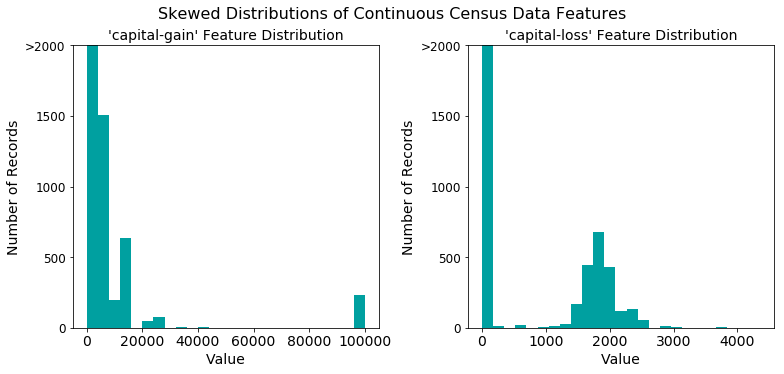

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)
save_fig("Skewed_Distributions")

- For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. 
- Using a logarithmic transformation significantly reduces the range of values caused by outliers. 
- Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

In [4]:
# Checking Range Right Now 
features_raw['capital-gain'].max()  - features_raw['capital-gain'].min()
# >> 99999
features_raw['capital-loss'].max()  - features_raw['capital-loss'].min()
# >> 4356.0

4356.0

Saving figure:  Log_Transformed_Distributions


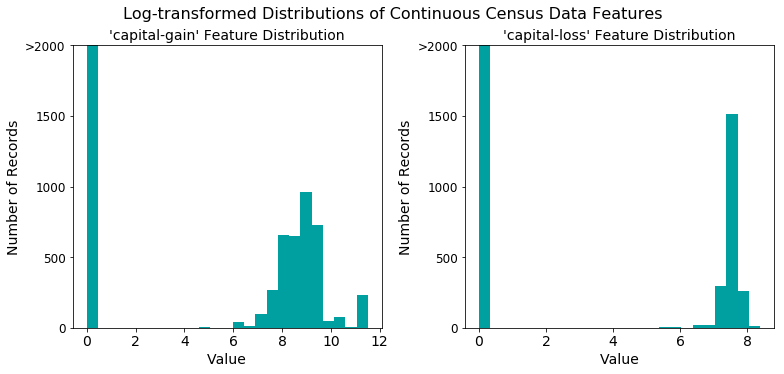

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)
save_fig("Log_Transformed_Distributions")

In [6]:
# Checking Range after logarithmic transformation: 
features_log_transformed['capital-gain'].max()  - features_log_transformed['capital-gain'].min()
# >> 11.512925464970229
features_log_transformed['capital-loss'].max()  - features_log_transformed['capital-loss'].min()
# >> 8.3795390261174418

8.3795390261174418

### Normalizing Numerical Features
- In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. 
- Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. 
- Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 
             'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(
    data = features_log_transformed)
features_log_minmax_transform[numerical] = \
scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Visualsing scaling of numerical features: 
- Notice how the shape of the distribution does not change. Only the range of the `xlabel` does. 

Saving figure:  Visualising_MinMax_Scaling


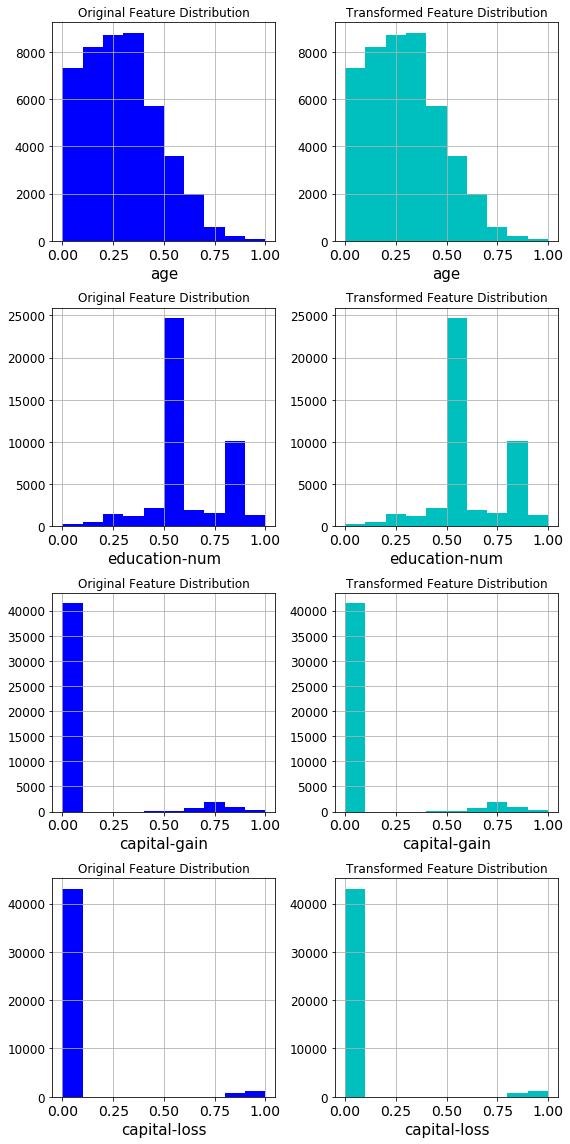

In [8]:
plt.figure(figsize = (8, 16))
for subplot, num_col in zip([421, 423, 425, 427], 
                            numerical[:4]):
    plt.subplot(subplot)
    features_log_transformed[num_col].hist(color = "b")
    plt.xlabel(num_col, fontsize = 15)
    plt.title("Original Feature Distribution")
    
for subplot, num_col in zip([422, 424, 426, 428], 
                            numerical[:4]):
    plt.subplot(subplot)
    features_log_minmax_transform[num_col].hist(color = "c")
    plt.xlabel(num_col, fontsize = 15)
    plt.title("Transformed Feature Distribution")
    
save_fig("Visualising_MinMax_Scaling")

### Implementation: Data Preprocessing

- From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. 
- One popular way to convert categorical variables is by using the **one-hot encoding** scheme. 
- One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

- Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. 
- Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. 
- In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [9]:
# Expected one-hot encoded columns generated 
categorical = ["workclass", "education_level", "marital-status",
              "occupation", "relationship", "race", "sex",
               "native-country"]

# Printing the number of unique values in each categorical 
# column
print(features_log_minmax_transform[categorical].apply(lambda x: x.nunique()))

# Printing the total number of unique values from all
# categorical columns
print(np.sum(features_log_minmax_transform[categorical].apply(lambda x: x.nunique())))
# >> 98

# There are 5 numerical columns
# Expected total number of columns: 98 + 5 = 103

workclass           7
education_level    16
marital-status      7
occupation         14
relationship        6
race                5
sex                 2
native-country     41
dtype: int64
98


In [10]:
# TODO: One-hot encode the 'features_log_minmax_transform' 
# data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)
# >> shape: (45222, 103)

# TODO: Encode the 'income_raw' data to numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
income = encoder.fit_transform(income_raw)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


- __Ensuring whether the splitting takes into account the skewed classes:__
    - The % of people having income greater than(or less than) 50,000 should be the same in:
        - The real population 
        - The test set
        - The train set

In [12]:
print("Real Population % ")
print(pd.DataFrame(income).iloc[:,0].value_counts()/len(income))
print("\ny_train %")
print(pd.DataFrame(y_train).iloc[:,0].value_counts()/len(y_train))
print("\ny_test %")
print(pd.DataFrame(y_test).iloc[:,0].value_counts()/len(y_test))

Real Population % 
0    0.752156
1    0.247844
Name: 0, dtype: float64

y_train %
0    0.75114
1    0.24886
Name: 0, dtype: float64

y_test %
0    0.756219
1    0.243781
Name: 0, dtype: float64


Yes! The percentages remain constant in the real population, train test as well as the test set. 

----
## Evaluating Model Performance
- In this section, we will investigate four different algorithms, and determine which is best at modeling the data. 
- Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [13]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall

# Accuracy, here: TP/ All Data 
accuracy = n_greater_50k/n_records

# Recall: TP/(TP + FN)
recall = n_greater_50k/(n_greater_50k + 0) # No FN

# Precision: TP/(TP + FP)
precision = n_greater_50k/n_records

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore = (1 + beta**2)*(precision*recall)/(((beta**2)*precision) + recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **
## `AdaBoostClassifier`: 
- __Describe one real-world application in an industry where the model can be applied__: 
    - This classifier can be used by various investment agencies to pitch the right investment scheme according to whether the person earns at most or more than 50,000.  
- __What are the strengths of the model; when does it perform well?__
    - It easily understands feature interactions and features importances when trained with decision trees/stumps by looking at how much the tree nodes that use a certain feature reduce impurity on average (across all trees/stumps). 
    - Its results are not tough to interpret. It returns:
        - `feature_importances_` to conduct feature selection.
        - `class probabilities`
        - `estimator_errors_`: through which you can visually see how the results are improving after each additional classifier added.  

  - Allows manual tuning of weak learners. You can remove a weak learner that may be performing very badly. 
- __What are the weaknesses of the model; when does it perform poorly?__
    - This classifier does not work well with small datasets. It needs enough data to run a number of weak learners on and learn incrementally. 
    - `AdaBoostClassifier` is also very sensitive to outliers. In the case the outlier is misclassified, it will assign a huge penalty to that outlier.  
- __What makes this model a good candidate for the problem, given what you know about the data?__
    - There is ample data available for the algorithm to run many weak learners on random subsets of the data.
    - As noted above, there are no outliers in the data. 
    - It has been known to be less prone to overfitting.

## `LogisticRegression`: 
- __Describe one real-world application in industry where the model can be applied__: 
    - This can be used by banks to pitch loan schemes to individuals based on their respective income. 
- __What are the strengths of the model; when does it perform well?__  
    - Gives a nice probabilistic interpretation. This helps us to manually tune thresholds. 
    - Training and prediction speed is fast. 
    - It is easily regularized using the regularization parameter, `l2` or `l1`. 
- __What are the weaknesses of the model; when does it perform poorly?__
    - They cannot learn feature interactions as well as `DecisionTrees`. 
    - Makes "close calls" which may lead to misclassification. For eg: If the logistic function's output is $0.51$, and the threshold is set to $0.50$, the data point will be classified as $1$. 
- __What makes this model a good candidate for the problem, given what you know about the data?__
    - Using the probabilities interpretation and manually tuning thresholds could be useful. 
    - `LogisticRegression` has respectively lesser hyperparameters. This will make tuning the model easier if it works well. 

## `LinearSVC`: 
- __Describe one real-world application in industry where the model can be applied__: 
    - This can be used by realtors to understand which houses individuals may be interested in based on their income. 
- __What are the strengths of the model; when does it perform well?__
    - Accuracy and Overfitting are easily controlled by parameter `C`. 
    - They work well with non-linear separation as well.  
- __What are the weaknesses of the model; when does it perform poorly?__
    - They are memory intensive and take time to train. 
    - They are very sensitive to outliers. 
    - They are harder to interpret as compared to `DecisonTrees`. 
    - They don't work with large datasets. 
- __What makes this model a good candidate for the problem, given what you know about the data?__
    - This model may perform well if there is a clear marginal separation between the two classes. 
    - As noted above, there are no outliers in the data so `LinearSVC` will not have a problem performing well. 

## Comparing Estimators (default settings): 

In [14]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

# Making a F_0.5 scorer for comparing all classifiers
scorer = make_scorer(fbeta_score, beta = 0.5)

from sklearn.model_selection import cross_val_score
def scores(estimator, X_train, y_train):
    """
    Inputs:
        - estimator: Classifier
        - X_train: The training features
        - y_train: The training labels
        
    Outputs: 
    Series with:
        - 3-fold cross validation scores 
        - Mean of cross validation scores
        - Std_dev of cross validation scores
        - Training time 
    """
    start = time()
    estimator.fit(X_train, y_train)
    end = time()
    train_time = end - start
    
    scores = cross_val_score(estimator,X_train,y_train,
                        scoring = scorer, cv = 3)
    
    mean = scores.mean()
    std_dev = scores.std()
    display = np.append(np.array(scores), [mean, std_dev,
                                          train_time]).reshape(6,1)
    display_df = pd.DataFrame(display, index = ["cv1", "cv2", 
                                          "cv3","mean", "std_dev",
                                               "train_time"])
    return display_df

### Creating `DataFrame` comparing all estimators: 

In [15]:
"""All Estimators Compared: """
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(random_state=42)

from sklearn.linear_model import SGDClassifier
# Logistic Regression Classifier: 
sgd_log_clf = SGDClassifier(random_state = 42, 
                       loss = "log")

# Linear SVM: 
sgd_svm_clf = SGDClassifier(random_state = 42)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 42)

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
lin_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(loss="hinge", 
                                 random_state=42,
                                ))))

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state = 42)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators = [("ada_boost", ada_clf),
                 ("rfc", rnd_clf),
                 ("log_reg", log_reg),
                 ("tre_clf", tree_clf)], 
    voting = "soft")

# Final Results DataFrame
results = pd.DataFrame()

estimators_list = [gnb_clf, lin_svm_clf, sgd_log_clf,
                   log_reg, tree_clf, ada_clf, rnd_clf, 
                   voting_clf]

for clf in estimators_list:
    scores_clf = scores(clf, X_train, y_train)
    results = pd.concat([results,scores_clf], axis = 1)
    
results.columns = ["gnb_clf" ,"lin_svm_clf","sgd_log_clf",
                   "log_reg","tree_clf", "ada_clf", "rnd_clf" 
                   ,"voting_clf"]
results

,gnb_clf,lin_svm_clf,sgd_log_clf,log_reg,tree_clf,ada_clf,rnd_clf,voting_clf
cv1,0.428287,0.678372,0.643266,0.690637,0.628028,0.727361,0.675055,0.680235
cv2,0.392447,0.689104,0.654220,0.689722,0.625299,0.725473,0.677330,0.671215
cv3,0.412520,0.681875,0.676511,0.694741,0.633198,0.728672,0.677755,0.682690
mean,0.411085,0.683117,0.657999,0.691700,0.628842,0.727169,0.676713,0.678047
std_dev,0.014667,0.004468,0.013833,0.002183,0.003276,0.001313,0.001185,0.004934
train_time,0.133046,13.891110,0.228244,0.332679,0.557170,1.838031,0.790950,3.658658


### Plotting Training Time and Mean Cross Validation Score for each estimator: 

Saving figure:  Comparing_SL_algorithms


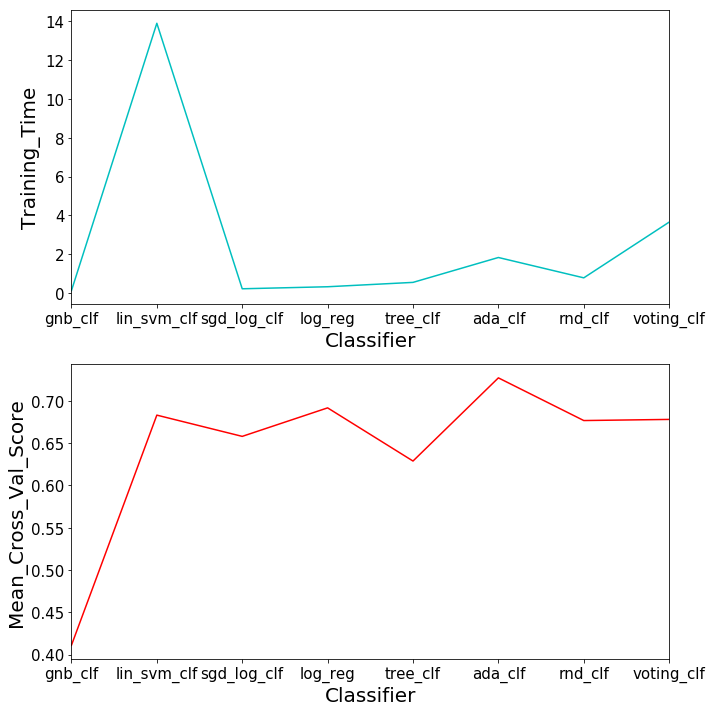

In [16]:
plt.figure(figsize = (10,10))
plt.subplot(211)
results.loc["train_time",:].plot(color = "c", fontsize = 15)
plt.xlabel("Classifier", fontsize = 20)
plt.ylabel("Training_Time", fontsize = 20 )

plt.subplot(212)
results.loc["mean",:].plot(color = "r", fontsize = 15)
plt.xlabel("Classifier", fontsize = 20)
plt.ylabel("Mean_Cross_Val_Score", fontsize = 20 )
save_fig("Comparing_SL_algorithms")

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [17]:
# TODO: Import two metrics from sklearn - fbeta_score 
# and accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import StandardScaler

def train_predict(learner, sample_size, X_train, y_train,
                 X_test, y_test):
    """
    inputs: 
    - learner: the learning algorithm to be trained and 
    predicted on
    - sample_size: the size of samples (number) to be drawn
    from training set 
    - X_train: features training set
    - y_train: income training_Set
    - X_test: features testing set
    - y_test: income testing set 
    """
    results = {}
    
    # TODO: Fit the learner to the training data using slicing
    # with `sample_size` using 
    # .fit(training_features[:],training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],
                          y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculating the training time: 
    results["train_time"] = end - start
    
    # TODO: Get the predictiong on the test set (X_test),
    # then get prediction on the first 300 training samples
    # using .predict()
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    
    # TODO: Calculate the total prediction time: 
    results["pred_time"] = end - start
    
    # TODO: Compute the accuracy of the first 300 training
    # samples which is y_train[:300]
    results["acc_train"] = accuracy_score(y_train[:300],
                                         predictions_train)
    
    # TODO: Compute accuracy on the test set
    results["acc_test"] = accuracy_score(y_test, 
                                         predictions_test)
    
    # TODO: Compute the F-score on the first  300 training
    # samples using fbeta_score()
    results["f_train"] = fbeta_score(y_train[:300],
                                    predictions_train,
                                    beta = 0.5)
    
    # TODO: Compute F-score on the test set which y_test
    results['f_test'] = fbeta_score(y_test,
                                   predictions_test,
                                   beta = 0.5)
    
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
Pipeline trained on 361 samples.
Pipeline trained on 3617 samples.
Pipeline trained on 36177 samples.


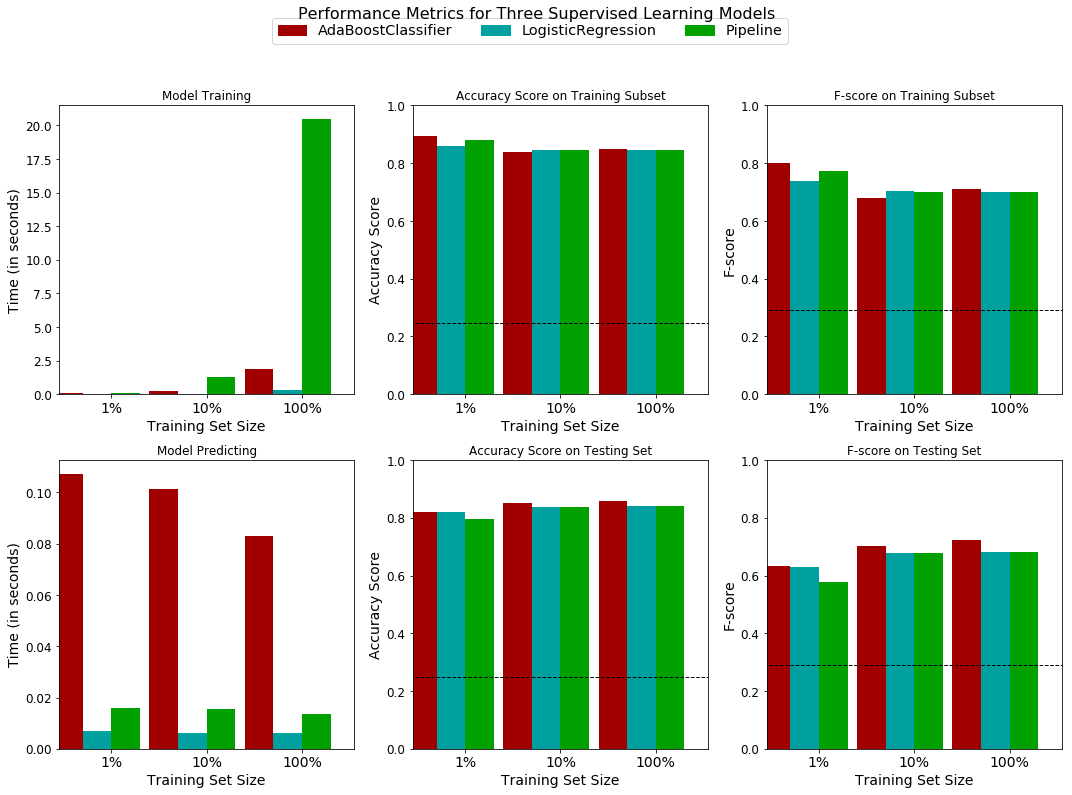

In [18]:
# TODO: Import the three supervised learning model from
# sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# TODO: Initialize the three models: 
clf_A = AdaBoostClassifier(random_state = 42)
clf_B = LogisticRegression(random_state = 42)
clf_C = Pipeline((
        ("scaler", StandardScaler()),
        ("lin_svc", LinearSVC(random_state=42))))

# TODO: Calculate the number of samples for 1%, 10%, 100% of
# the training data
# HINT: sample_100 is the entire training set i.e len(y_train)
# HINT: sample_10 is 10% of samples_100
# HINT: sample_1 is 1% of samples_100
samples_100 = len(X_train)
samples_10 = len(X_train)//10
samples_1 = len(X_train)//100 # Changed to suit AdaBoosClassifier 

# Collect results on the learners: 
results = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i , samples in enumerate([samples_1, samples_10,
                                  samples_100]): # [(0, 5), (1, 10), (2, 100)]
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test,
                     y_test)
        
# Run metrics visualisation for the three supervised learning
# models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
- In this final section, you will choose from the three supervised learning models the *best* model to use on the student data.
- You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

In [20]:
# Results after training on the whole training set:
results_ = pd.DataFrame()
# Note, 2 here means to access the train/test time and scores 
# when the whole training data was used. 
results_ = results_.append(pd.Series(results["AdaBoostClassifier"][2], name = "ada_clf"))
results_ = results_.append(pd.Series(results["LogisticRegression"][2], name = "log_reg"))
results_ = results_.append(pd.Series(results["Pipeline"][2], name = "lin_svm"))
results_


,acc_test,acc_train,f_test,f_train,pred_time,train_time
ada_clf,0.857601,0.850000,0.724551,0.711538,0.083069,1.861807
log_reg,0.841902,0.846667,0.683165,0.698529,0.006062,0.316951
lin_svm,0.840354,0.846667,0.681113,0.700758,0.013614,20.469305


### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **  

- I think __`AdaBoostClassifier`__ is most appropriate for identifying individuals that make more than $\$50,000.$
- __Accuracy on `test set`__: 
    - It gets an accuracy of $86\%$ (aprx) on the `test set` as compared to other two models: 
        - 84% with both `LogisticRegression` and `LinearSVC`  
        
> This means it correctly labels $86\%$ of the data.   

- __F-score on `test set`__:
    - It gets an F-score of $\approx 0.72$  on the `test set` as compared to the other two models: 
       - $\approx 0.68$ with both `LogisticRegression` and `LinearSVC`
    - This means that the `AdaBoostClassifier` has good _precision_, as well as _recall_. 
    > - In other words, the model is __good__ at the following two things:
        - _Finding most_ of the people who earn more than \$50,000 out of the ones who do.  
        - Correctly labeling a person _positive_ (i.e, to be earning more than $\$50,000$). Conversely, __not__ labeling a person as _positive_ when the person does not earn more than $\$50,000$. 

- __Training time__: 
    - It takes low to moderate amount of time to train on the whole `training set`, $\approx 2$ seconds which is way less as compared to `LinearSVC`'s training time, $\approx 22$ seconds. 
        - This will be essential if we have to tune the `hyparameters` of the model to see which combination of `hyperparameters` works best. 
        - It also proves that this will scale well with more training examples.
- __Prediction time__: 
    - The only place where this algorithm performs slightly worse than the other two is prediction time. It takes the longest to predict, $\approx 0.09$ seconds on the `test set`, which is still quite fast.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.  

**Answer:**    

__Some definitions:__ 
- A __classifier__ is an algorithm which maps input data to a category. Here, the input data is details about a person (age, sex, education, occupation, etc.) and the categories are _" Earns more than or equal to $\$50,000$"_ or _"Earns less than $\$50,000$"_.    
- A bunch of classifiers is known as an __ensemble__. 
- `AdaBoostClassier` is one of the __Ensemble Learning__  techniques in machine learning. 
- A __weak leaner__ is a classifier which does slightly better than random guessing. 
- _Ensemble Learning_ uses _wisdom of the crowd_. In other words, it aggregates the predictions of a bunch of weak learners to arrive at a final answer.   
- Specifically, `AdaBoostClassifier` is one of the __boosting__ methods. __Boosting__ refers to an _ensemble learning_ technique wherein many weak learners/classifiers are trained _sequentially_, each of which tries to correct its predecessor.     

__How does it train and predict?__  
- Each instance's _weight_ is set to $\frac{1}{m}$ initially, where $m$ is the number of instances in the input data. 
- The first base classifier is trained and used to make predictions on the training set.   
- The classifier's weight is computed. The more accurate the classifier is, the higher weight it gets. If the classifier is just guessing, its weight will be close to 0. And if it is most often wrong, its weight will be negative. 
- Then, the relative weight of the misclassified training instances is increased. 
- Sequentially, a second classifier is trained using the updated instance weights and the whole process is repeated, i.e. the new classifier's weight is computed, the instance's weights are updated,  a new classifier is trained, and so on.   
- The process stops when the desired number of classifiers are trained. 
- To make predictions, `AdaBoostClassifier` simply computes the predictions of all the classifiers and weighs them using the classifier weights calculated. 
- The predicted class is the one that receives _majority_ of the _weighted votes_.   

__References:__  
[Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.in/dp/B06XNKV5TS/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1 )

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

### Note: The `learning_rate` parameter is set to `0.3` after tuning multiple models in a seperate jupyter notebook. Each had a different `learning rate`. 

In [21]:
# TODO: Import 'GridSearchCV', 'make_scorer', 
# and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the classifier
tree_clf = DecisionTreeClassifier(random_state = 42)
ada_clf = AdaBoostClassifier(base_estimator = tree_clf,
                             random_state = 42, 
                            learning_rate=0.3)

# TODO: Create the parameters list you wish to tune, 
# using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 
# 'parameter_2': [value1, value2]}

parameters = {
    "base_estimator__max_depth":[1,2,4,8],
    "base_estimator__min_samples_leaf":[10,100],
    "base_estimator__min_samples_split":[10, 100, 200, 500,1000],
    "n_estimators": [10, 50, 100, 500]}

# TODO: Make an fbeta_score scoring object using 
# make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer'
# as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(ada_clf, param_grid = parameters,
                       scoring = scorer, cv = 3)

In [22]:
# TODO: Fit the grid search object to the training data 
# and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

In [23]:
# Get the estimator
best_clf = grid_fit.best_estimator_

In [24]:
# Make predictions using the unoptimized and model
predictions = (ada_clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

In [25]:
# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8165
F-score on testing data: 0.6234

Optimized Model
------
Final accuracy score on the testing data: 0.8714
Final F-score on the testing data: 0.7534


In [26]:
# Saving the model
from sklearn.externals import joblib
joblib.dump(best_clf, "best_clf.pkl")
# best_clf_loaded = joblib.load("best_clf.pkl")

['best_clf.pkl']

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: |
| Accuracy Score |     0.2478          |     0.8165        |   0.8714        |
| F-score        |    0.2917           |     0.6234        |   0.7534        |


**Answer:**  
- __What are your optimized model's accuracy and F-score on the testing data?__   
    - __`Accuracy`__: $\approx87\%$
    - __`F-Score`__: $\approx0.75$
- __Are these scores better or worse than the unoptimized model? __
    - __`Accuracy`__: The optimised model's accuracy is better than the unoptimized model's accuracy by $\approx5\%$. 
        - This means that model will now correctly label $\approx5\%$ more of the data than it used to with the unoptimised model. 
    - __`F-score`__: The optimised model's f-score is better than the unoptimized model's f-score by $0.12$ which means there has been a significant increase in both precision and recall. 
- __How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?__
    - __`Accuracy`__: The optimised model's accuracy is better than the naive predictor's accuracy by $\approx61\%$. 
        - The naive predictor correctly labeled only $\approx25\%$ of the data, which is miles apart from the optimised model, which correctly labels $\approx87\%$ of the data. 
    - __`F-score`__: The optimised model's f-score is better than the unoptimized model's f-score by $\approx0.46$, which is a huge difference! The naive predictor had neither a good precision nor a good recall. 

----
## Feature Importance

- An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. 
- By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. 
- In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than $\$50,000.$

- Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  
- In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
1.   __`age`__: Income is usually positively correlated for people between 20 and 50, then, it becomes negatively correlated after age 50. 
2. __`education-num`__: Your education defines how high a salary a person gets. 
3.  __`hours-per-week`__: The more work a person puts in, the more his/her income should be. 
4. __`workclass`__: The kind of `workclass` greately affects the income along with the `hours-per-week`. A person in `Private` job dedicating less `hours-per-week` than a person in a `Local-gov` job, still may be earning more than the person in a `Local-gov` job. 
5. __`native-country`__: income of a person hugely depends on the economy and living standard of the country. 

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

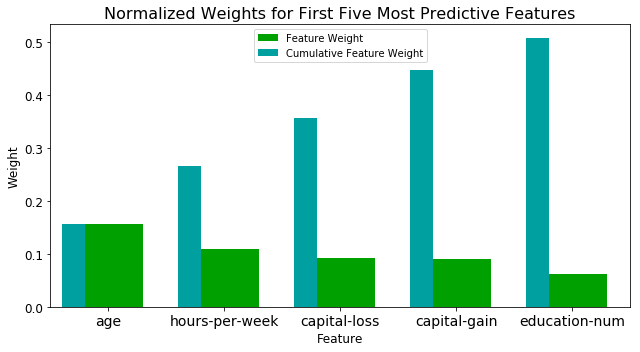

In [27]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# >> Already Done

# TODO: Train the supervised model on the training set using .
# fit(X_train, y_train)
model = None
# >> Already Done

# TODO: Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**   
- I was right about most of the features which are important, except `workclass` and `native-country`. Doing some digging, I found at that `workclass_ Federal-gov`, `workclass_ Local-gov`, `workclass_ Private`, `workclass_ Self-emp-inc` and `workclass_ Self-emp-not-inc` are in the top $10$, not in the top $5$.   
- Furthermore, I thought being in a country with good economic conditions will affect a person's income a lot! Somehow, most of the `native_country` dummy variables lie after $60^{th}$ most important feature. Their importance is either close to $0$, or $0$. 
- I completely missed out on `capital-gain` and `capital-loss`. This is probably because I did not understand what the features represented in the beginning. 
- A `capital-gain` refers to increase in the value of a capital asset (investment or real estate), and conversely `capital-loss` refers to fall in the value of a capital asset. 
- The confusing part for me was that I was thinking of `capital-gain` as notional-gain (estimated gain) without selling the capital asset. I later found out that `capital-gain` or `capital-loss` only occurs after the sale of a capital asset, which is directly linked to the person's income. 

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [28]:
# Import functionality for cloning a model
from sklearn.base import clone

# Return the indices that would sort the importances
# in descending order
desc_importances = np.argsort(importances)[::-1]
best_features_ix = desc_importances[:5]
best_features = X_train.columns.values[best_features_ix]

# Reduce the feature space
X_train_reduced = X_train[best_features]
X_test_reduced = X_test[best_features]

# Train on the "best" model found from grid search earlier
start = time()
clf = clone(best_clf).fit(X_train_reduced, y_train)
end = time()
train_time = end - start

# Make new predictions 
start = time()
reduced_predictions = clf.predict(X_test_reduced)
end = time()
pred_time = end - start 

# Report scores from the final model using both versions of data
print ("Final Model trained on full data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
print ("Training Time: {}".format(train_time))
print("Prediction Time: {}".format(pred_time))

Final Model trained on full data
------
Accuracy on testing data: 0.8714
F-score on testing data: 0.7534

Final Model trained on reduced data
------
Accuracy on testing data: 0.8430
F-score on testing data: 0.7001
Training Time: 8.958592891693115
Prediction Time: 0.572228193283081


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used? 
* If training time was a factor, would you consider using the reduced data as your training set? 

**Answer:**  
* __How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?__ 
    - There is a notable difference between the two models. The model that was trained on the full data had $3\%$ more accuracy and $.05$ more $F_{0.5}$ score than the model that is trained on reduced data. 
* __If training time was a factor, would you consider using the reduced data as your training set?__ 
    - That would totally depend on how many more training examples are going to be added. 
    - I would not use the reduced set for a small dataset, but if the dataset becomes very large, it would be wise to use the reduced data. 
    - According to me, a good method would be to check where the performance plateaus as we keep on increasing the number of features. 

## Plotting how Accuracy / $F_{0.5}$ Score behaves as we keep increasing the number of features (in order of importance):

In [29]:
# Find each feature's importance: 
importances = best_clf.feature_importances_

# Index of features in descending order of importance 
desc_importances_ix = np.argsort(importances)[::-1]

# Rearrange importances in descending order
desc_importances = importances[desc_importances_ix]

# Finding cumulative importances:
cumsum_importances = np.cumsum(desc_importances)

# Creating list of indices to be used to slice 
# desc_importances_ix in order to get the right features 
# contributing to a certain importance level from 0.2 
# to 1
imp_features_ix = []
imp_list = np.linspace(0.2,1,9)
for imp in imp_list:
    imp_features_ix.append((imp,
                            np.argmax(cumsum_importances >= imp)))

# Creating some arrays used for plotting
acc_list = []
train_time_list = []
fbeta_list = []

# Looping through each importance level, training the 
# classifier on each level of importance, calulating the 
# train_time with ech level of importance and the 
# accuracy and f-score with each level of importance: 

for feature_ix in imp_features_ix:
    # Get the sliced feature indices for current importance
    # level
    sliced_features_ix = desc_importances_ix[:feature_ix[1]]
    # Get the names of the sliced features
    sliced_features = X_train.columns.values[sliced_features_ix]
    # Slice the feature space
    X_train_sliced = X_train[sliced_features]
    X_test_sliced = X_test[sliced_features]

    # Train on the "best" model found from grid search earlier
    start = time()
    clf = clone(best_clf).fit(X_train_sliced, y_train)
    end = time()
    train_time = end - start
    # Append train time to the list
    train_time_list.append(train_time)
    
    # Make new predictions 
    sliced_predictions = clf.predict(X_test_sliced)
    
    # Accuracy on test set:
    acc = accuracy_score(y_test, sliced_predictions)
    # Append accuracy on test set to the list: 
    acc_list.append(acc)
    
    # F0.5 score on test set:
    f_score = fbeta_score(y_test, sliced_predictions, beta = 0.5)
    # Append fbeta score on test set to the list: 
    fbeta_list.append(f_score)

//anaconda/envs/dlndf/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Seeing where performance plateaus: 

Saving figure:  Visualising_Performance_Plateau


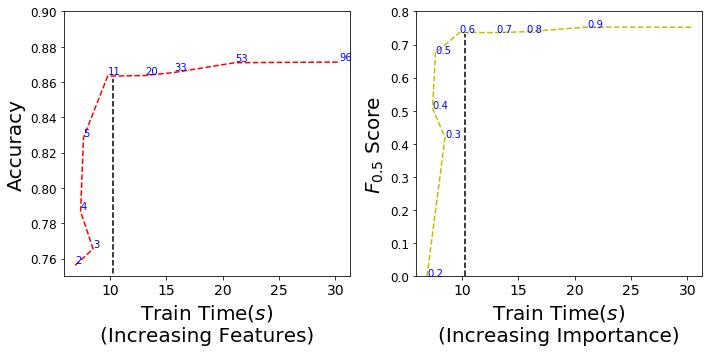

In [45]:
plt.figure(figsize = (10,5))
train_time_list = np.array(train_time_list)
acc_list = np.array(acc_list)
fbeta_list = np.array(fbeta_list)

plt.subplot(121)
plt.plot(train_time_list, acc_list, "r--")
for train_time, acc, imp in zip(train_time_list,acc_list,imp_features_ix):
    plt.text(train_time,acc + 0.001, imp[1] + 1 , fontsize = 10, color='blue', label = "Feature Importance")
plt.axis([train_time_list.min() - 1, train_time_list.max() + 1, 
         0.75 , 0.90]) 
plt.plot([10.28, 10.28],[0, 0.8619],"k--")
plt.xlabel("Train Time"+r"$(s)$"+"\n(Increasing Features)", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.legend()

plt.subplot(122)
plt.plot(train_time_list, fbeta_list, "y--")
for train_time, fbeta, imp in zip(train_time_list,fbeta_list,np.arange(0.2,1,0.1)):
    plt.text(train_time,fbeta, imp, fontsize = 10, color='blue')
plt.axis([train_time_list.min() - 1, train_time_list.max() + 1, 
         0.0 , 0.80]) 
plt.plot([10.28, 10.28],[0, 0.7318],"k--")

plt.xlabel("Train Time"+r"$(s)$"+"\n(Increasing Importance)", fontsize = 20)
plt.ylabel("$F_{0.5}$ Score", fontsize = 20)
save_fig("Visualising_Performance_Plateau")

### Training with 11 most important features:

In [31]:
# Import functionality for cloning a model
from sklearn.base import clone

# Return the indices that would sort the importances
# in descending order
desc_importances = np.argsort(importances)[::-1]

best_features_ix = desc_importances[:11]
best_features = X_train.columns.values[best_features_ix]

# Reduce the feature space
X_train_reduced = X_train[best_features]
X_test_reduced = X_test[best_features]

# Train on the "best" model found from grid search earlier
start = time()
clf = clone(best_clf).fit(X_train_reduced, y_train)
end = time()
train_time = end - start

# Make new predictions 
start = time()
reduced_predictions = clf.predict(X_test_reduced)
end = time()
pred_time = end - start 

# Report scores from the final model using both versions of data
print ("Final Model trained on full data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
print ("Training Time: {}".format(train_time))
print("Prediction Time: {}".format(pred_time))

Final Model trained on full data
------
Accuracy on testing data: 0.8714
F-score on testing data: 0.7534

Final Model trained on reduced data
------
Accuracy on testing data: 0.8619
F-score on testing data: 0.7318
Training Time: 10.283026933670044
Prediction Time: 0.5480258464813232


**Comparing Training Time, Accuracy and $F_{0.5}$ Score of the optimised model , when trained on full training data vs when trained on reduced training data:**   

| Training Set   |    Training Time    |     Accuracy      | $F_{0.5}$ Score |
| :------------: | :-----------------: | :---------------: | :-------------: |
|**All Features**|    32.513           |     0.8714        |   0.7534        |
|**11 most Imp.**|    10.283           |     0.8619        |   0.7318        |  

By reducing the number of feature to just $11$, we divided the training time by $3.16$, at the cost of sacrificing accuracy by $0.95$ and $F_{0.5}$ Score by $0.0215$. This cost, according to me is acceptable. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.